In [12]:
df1 = pd.read_excel('/kaggle/input/nyamirambo/Nyamirambo.xlsx')
df2 = pd.read_csv('/kaggle/input/karama/Karama.csv')
df3 = pd.read_excel('/kaggle/input/kacyiru/Kacyiru.xlsx')

df1.head()



,Name,Location,Number,Sentiment
0,Asuma,Nyamirambo,728680045,1
1,Abdoul,Nyamirambo,788221508,1
2,Adelina,Nyamirambo,787487893,1
3,Adorfe,Nyamirambo,781979001,1
4,Bosco,Nyamirambo,784742459,1


In [14]:
df2.head()

,Name,Location,Number,Sentiment
0,Joel,Karama,786659669,1
1,Dusabe,Karama,798858655,1
2,Obed,Karama,788393113,1
3,Yvonne,Karama,791705620,1
4,Monique,Karama,738337240,0


In [15]:
df3.head()

,Name,Location,Number,Sentiment
0,Eugene,Gikondo,781275548,1
1,Emmy,Gikondo,790041035,1
2,Whitney,Remera,791653301,1
3,Nelson,Gikondo,786631257,1
4,Darcy,Gatenga,782721607,1


In [16]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
df1 = pd.read_excel('/kaggle/input/nyamirambo/Nyamirambo.xlsx')
df2 = pd.read_csv('/kaggle/input/karama/Karama.csv')
df3 = pd.read_excel('/kaggle/input/kacyiru/Kacyiru.xlsx')

# Combining datasets
df_all = pd.concat([df1, df2, df3], ignore_index=True)

# Drop duplicates and rows with missing Location or Sentiment
df_all.drop_duplicates(inplace=True)
df_all.dropna(subset=['Location', 'Sentiment'], inplace=True)

# Standardize sentiment
df_all['Sentiment'] = df_all['Sentiment'].astype(int)
df_all['Sentiment_Label'] = df_all['Sentiment'].map({1: 'Positive', 0: 'Negative'})

# Preview
print(f"Dataset shape: {df_all.shape}")
df_all.head()


Dataset shape: (366, 5)


,Name,Location,Number,Sentiment,Sentiment_Label
0,Asuma,Nyamirambo,728680045,1,Positive
1,Abdoul,Nyamirambo,788221508,1,Positive
2,Adelina,Nyamirambo,787487893,1,Positive
3,Adorfe,Nyamirambo,781979001,1,Positive
4,Bosco,Nyamirambo,784742459,1,Positive


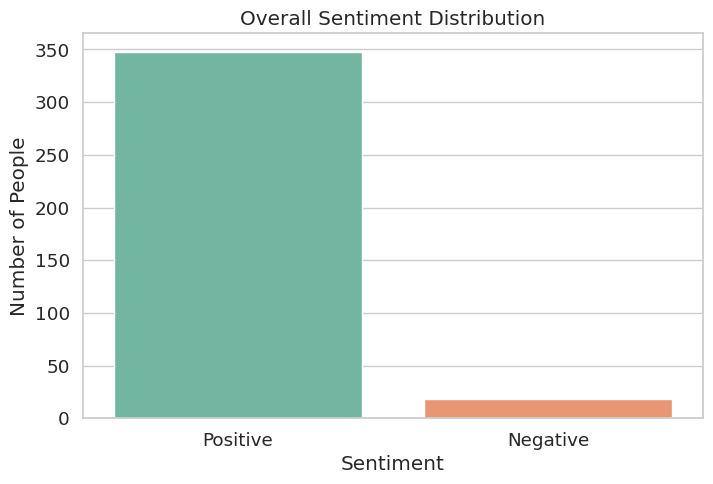

In [18]:
# Sentiment bar plot
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)
plt.figure(figsize=(8, 5))

sns.countplot(data=df_all, x='Sentiment_Label', palette='Set2')
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of People')
plt.show()


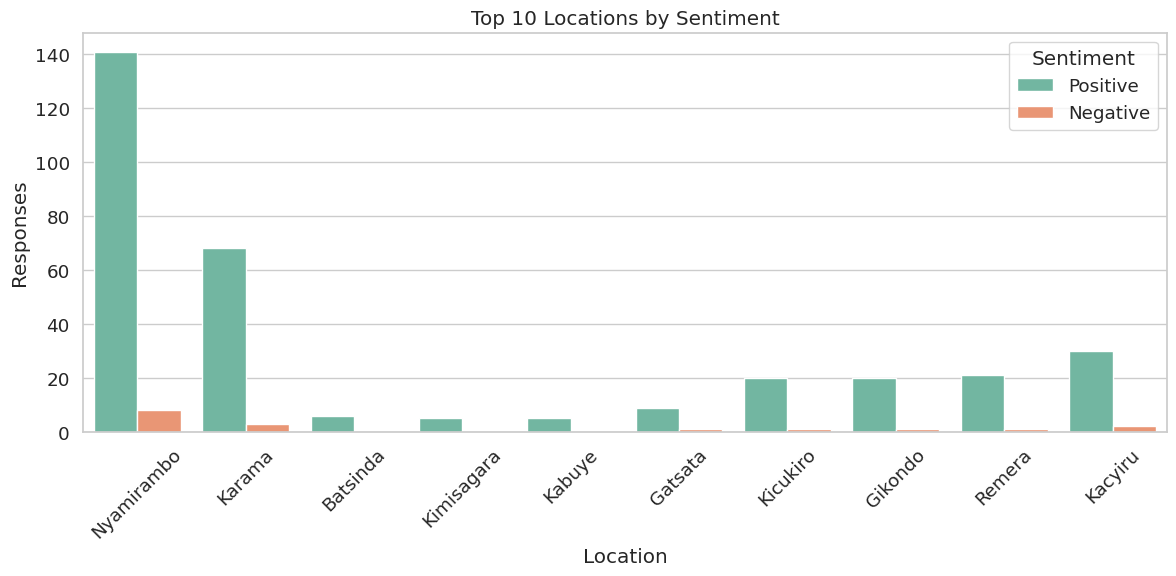

In [20]:
# Top 10 Locations by record count
top_locs = df_all['Location'].value_counts().nlargest(10).index
filtered_df = df_all[df_all['Location'].isin(top_locs)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='Location', hue='Sentiment_Label', palette='Set2')
plt.title('Top 10 Locations by Sentiment')
plt.xlabel('Location')
plt.ylabel('Responses')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


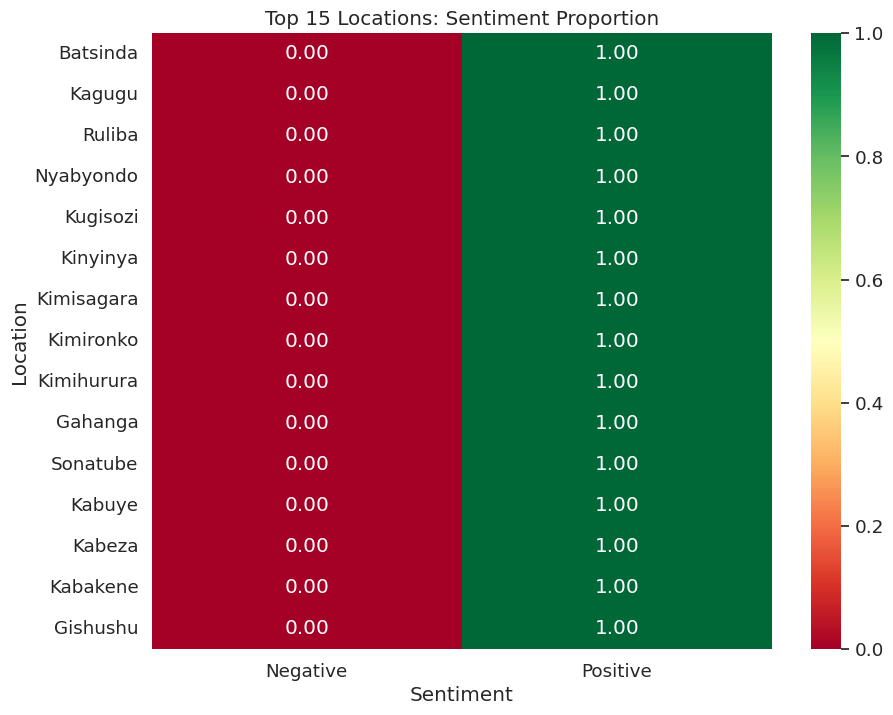

In [21]:
# Sentiment proportions per location
sentiment_ratio = (
    df_all.groupby('Location')['Sentiment']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
    .rename(columns={0: 'Negative', 1: 'Positive'})
    .sort_values(by='Positive', ascending=False)
)

plt.figure(figsize=(10, 8))
sns.heatmap(sentiment_ratio.head(15), annot=True, cmap="RdYlGn", fmt=".2f")
plt.title('Top 15 Locations: Sentiment Proportion')
plt.ylabel('Location')
plt.xlabel('Sentiment')
plt.show()
